# **Análisis de comportamiento en transacciones para ATM´s**

El siguiente reporte contiene datos de transacciones para ATMs a nivel nacional, para entender su comportamiento y tomar ideas de los gráficos.

In [1]:
# importando librerias
import pandas as pd
import numpy as np
import re
# Data visualizarion
import plotly.graph_objects as go
import plotly
import plotly.offline as py
from plotly.offline import iplot
import plotly.io as pio
import cufflinks as cf
import plotly.express as px
cf.go_offline()
import matplotlib.pyplot as plt

Vamos a cargar el archivo de atms, para colocar algunas otras columnas informativas.

In [3]:
# Leyendo datos
atm = pd.read_excel('D:\\atmstransacciones\\atm-temporal.xlsx')

In [4]:
atm.head(4)

,terminales,location,corregimiento,distrito,provincia,adquirente,enero,febrero,marzo,abril,mayo,junio,Promedio,longitud,latitud
0,101,BNP/S99 TOW CENTER/101,BURUNGA,ARRAIJAN,PANAMA OESTE,BANCO NACIONAL DE PANAMA,3403.0,4289.0,5285.0,6632.0,5585.0,5895.0,5181.500000,-79.65350,8.95930
1,102,BNP/MI BUS LOS PUEBLOS/102,JUAN DIAZ,PANAMA,PANAMA,BANCO NACIONAL DE PANAMA,3923.0,3794.0,2472.0,3087.0,3996.0,3142.0,3402.333333,-79.45431,9.04989
2,103,BNP/CSS CLAYTON/103,ANCON,PANAMA,PANAMA,BANCO NACIONAL DE PANAMA,4157.0,4982.0,5186.0,5426.0,4846.0,4733.0,4888.333333,-79.56578,9.00743
3,104,BNP/SUC NUEVO ARRAIJAN/104,VISTA ALEGRE,ARRAIJAN,PANAMA OESTE,BANCO NACIONAL DE PANAMA,10626.0,9299.0,11621.0,13443.0,10088.0,10406.0,10913.833333,-79.71348,8.92549


In [5]:
# Funcion para crear tel tipo de 

In [6]:
def volumen_transaccion(promedio):
    if promedio <= 500:
        return 'Muy Bajo'
    elif promedio >500 and promedio <=2000:
        return 'Bajo'
    elif promedio >2000 and promedio <=4000:
        return 'Regular'
    elif promedio > 4000 and promedio <=6000:
        return 'Bueno'
    else:
        return 'Alto'

In [7]:
# Creando columna de volumen
atm['volumen'] = atm['Promedio'].apply(volumen_transaccion)

In [8]:
# llenando nan con 0
atm = atm.fillna(0)

In [9]:
atm.to_excel('D:\\atmstransacciones\\atmprueba_lleno.xlsx', index=False)

In [10]:
# segmentando por volumen
muy_bajo = atm[atm['volumen']=='Muy Bajo']
bajo = atm[atm['volumen']=='Bajo']
regular = atm[atm['volumen']=='Regular']
bueno = atm[atm['volumen']=='Bueno']
alto = atm[atm['volumen']=='Alto']

## **ANÁLISIS EXPLORATORIO DE DATOS**

## **Datos Generales**

En este apartado observaremos los datos generales para todos los ATMs.

In [11]:
print(f'Tenemos {sum(atm.shape)} ',atm.shape)

Tenemos 2232  (2216, 16)


In [12]:
#banco adquirente
adquirente = atm['adquirente'].value_counts()
adquirente.iplot(kind="bar",title='NÚMERO DE ATMS POR INSTITUCIÓN ADQUIRENTE',size=15, color='navy')

In [13]:
# Promedio de transacciones por mes para aquirentes
adquirente_mes = atm[['adquirente','enero','febrero','marzo','abril','mayo','junio']]
adquirente_promedio = adquirente_mes.groupby(by=['adquirente']).mean()
adquirente_total = adquirente_mes.groupby(by=['adquirente']).sum()

In [14]:
# transacciones mensuale
adquirente_promedio.iplot(kind="bar",title='PROMEDIO DE TRANSACCIONES MENSUALES PARA ADQUIRENTES EN ATMS',width=1200)

### Promedio de transciones por MES para cada adquirente.


click aquí--> https://preview.flourish.studio/6733368/Bdwqtw9Fi5niOq-zI0Pd66ZBQf3qUYtxPbFacE_0Dc4cRuBXB2_UnJFwNp4ll9Tb/

In [15]:
# transacciones mensuales
adquirente_total.iplot(kind="bar",title='TOTAL DE TRANSACCIONES MENSUALES PARA ADQUIRENTES EN ATMS',width=1200)

In [16]:
# corregimientos atms
corregimiento = atm['corregimiento'].value_counts()
corregimiento.iplot(kind="bar",title='CORREGIMIENTOS DONDE ESTAN UBICADOS LOS ATMS',size=15)

In [17]:
# distrito atms
distrito = atm['distrito'].value_counts()
distrito.iplot(kind="bar",title='DISTRITOS DONDE ESTAN UBICADOS LOS ATMS',size=15, color='magenta')

In [18]:
# distrito atms
provincia = atm['provincia'].value_counts()
provincia.iplot(kind="bar",title='DISTRITO DONDE ESTAN UBICADOS LOS ATMS',size=15, color='darkgreen')

In [19]:
#Percentage per gender
volumen = atm['volumen'].value_counts()
volumen = pd.DataFrame(volumen)

In [20]:
volumen.iplot(kind="bar",title='VOLUMENES GENERALES DE LOS ATMS',size=15)

In [21]:
#Percentage per gender
colors = ['red', 'green', 'orange', 'red','darkgreen']
fig = px.pie(volumen, values='volumen', names=volumen.index, title='DISTRIBUCIÓN DE VOLUMENES DE TRANSACCIONES',height=600)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [22]:
volumen_adquirente = atm[['adquirente','volumen', 'enero', 'febrero','marzo','abril','mayo','junio']]

In [23]:
volumen_adquirente.head()

,adquirente,volumen,enero,febrero,marzo,abril,mayo,junio
0,BANCO NACIONAL DE PANAMA,Bueno,3403.0,4289.0,5285.0,6632.0,5585.0,5895.0
1,BANCO NACIONAL DE PANAMA,Regular,3923.0,3794.0,2472.0,3087.0,3996.0,3142.0
2,BANCO NACIONAL DE PANAMA,Bueno,4157.0,4982.0,5186.0,5426.0,4846.0,4733.0
3,BANCO NACIONAL DE PANAMA,Alto,10626.0,9299.0,11621.0,13443.0,10088.0,10406.0
4,BANCO NACIONAL DE PANAMA,Alto,13562.0,13550.0,16503.0,17631.0,15038.0,14872.0


In [24]:
# AGRUPADO POR ADQUIRENTE Y VOLUMEN
volumen_adquirente_agrupado = volumen_adquirente.groupby(by=['adquirente','volumen']).mean()

In [25]:
# promedio de volumen de transacciones por adquirente
volumen_adquirente_agrupado.iplot(kind="bar",title='VOLUMEN DE TRANSACCIONES POR ADQUIRENTE PARA CADA MES',width=1200)

### **ATMS con transacciones muy bajas**

Recordemos que en este renglón se encuentran ATMs con menos de 500 transacciones en promedio por mes (enero-junio 2021).

In [26]:
#banco adquirente
muybajo_adquirente = muy_bajo['adquirente'].value_counts()
muybajo_adquirente.iplot(kind="bar",title='NÚMERO DE ATMS CON MUY BAJAS (MENOS DE 500) TRANSACCIONES POR ADQUIRENTE',size=15, color='darkred')

# Porecentaje de transacciones por adquirente.
fig = px.pie(muybajo_adquirente, values=muybajo_adquirente, names=muybajo_adquirente.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES MUY BAJAS',height=600)
fig.show()

In [27]:
# Promedio de transacciones por mes para aquirentes
muybajo_adquirente_mes = muy_bajo[['adquirente','enero','febrero','marzo','abril','mayo','junio']]
muybajo_adquirente_promedio = muybajo_adquirente_mes.groupby(by=['adquirente']).mean()
muybajo_adquirente_total = muybajo_adquirente_mes.groupby(by=['adquirente']).sum()

In [28]:
# transacciones mensuales.
muybajo_adquirente_promedio.iplot(kind="bar",title='PROMEDIO DE TRANSACCIONES MUY BAJAS MENSUALES PARA ADQUIRENTES EN ATMS',width=1200)

In [29]:
# corregimientos atms
muybajo_corregimiento = muy_bajo['corregimiento'].value_counts()
muybajo_corregimiento.iplot(kind="bar",title='CORREGIMIENTOS DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES MÁS BAJAS',size=15, color='darkred')

In [30]:
# Porecentaje de transacciones por corregimiento.
fig = px.pie(muybajo_corregimiento , values=muybajo_corregimiento , names=muybajo_corregimiento .index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES MUY BAJAS POR CORREGIMIENTO',height=600)
fig.show()

In [31]:
# distrito atms
muybajo_distrito = muy_bajo['distrito'].value_counts()
muybajo_distrito.iplot(kind="bar",title='DISTRITOS DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES MÁS BAJAS',size=15, color='darkred')

# Porecentaje de transacciones por Distrito.
fig = px.pie(muybajo_distrito  , values=muybajo_distrito  , names=muybajo_distrito.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES MUY BAJAS POR DISTRITO',height=600)
fig.show()

In [32]:
# corregimientos atms
muybajo_provincia = muy_bajo['provincia'].value_counts()
muybajo_provincia.iplot(kind="bar",title='PROVINCIA DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES MÁS BAJAS',size=15, color='darkred')

# Porecentaje de transacciones por pROVINCIA.
fig = px.pie(muybajo_provincia   , values=muybajo_provincia   , names=muybajo_provincia.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES MUY BAJAS POR PROVINCIA',height=600)
fig.show()

### **ATMS con transacciones bajas**

Recordemos que en este renglón se encuentran ATMs entre las 500 y 2000 transacciones en promedio por mes (enero-junio 2021).

In [33]:
#banco adquirente
bajo_adquirente = bajo['adquirente'].value_counts()
bajo_adquirente.iplot(kind="bar",title='NÚMERO DE ATMS CON BAJAS (ENTRE 500 Y 2000) TRANSACCIONES POR ADQUIRENTE',size=15, color='red')

# Porecentaje de transacciones por adquirente.
fig = px.pie(bajo_adquirente, values=bajo_adquirente, names=bajo_adquirente.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES BAJAS',height=600)
fig.show()

In [34]:
# Promedio de transacciones por mes para aquirentes
bajo_adquirente_mes = bajo[['adquirente','enero','febrero','marzo','abril','mayo','junio']]
bajo_adquirente_promedio = bajo_adquirente_mes.groupby(by=['adquirente']).mean()

In [35]:
# transacciones mensuales.
bajo_adquirente_promedio.iplot(kind="bar",title='PROMEDIO DE TRANSACCIONES BAJAS MENSUALES PARA ADQUIRENTES EN ATMS',width=1200)

In [36]:
# corregimientos atms
bajo_corregimiento = bajo['corregimiento'].value_counts()
bajo_corregimiento.iplot(kind="bar",title='CORREGIMIENTOS DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES BAJAS',size=15, color='red')

# Porecentaje de transacciones por corregimiento.
fig = px.pie(bajo_corregimiento , values=bajo_corregimiento , names=bajo_corregimiento .index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES BAJAS POR CORREGIMIENTO',height=600)
fig.show()

In [37]:
# distrito atms
bajo_distrito = bajo['distrito'].value_counts()
bajo_distrito.iplot(kind="bar",title='DISTRITOS DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES BAJAS',size=15, color='red')

# Porecentaje de transacciones por Distrito.
fig = px.pie(bajo_distrito  , values=bajo_distrito  , names=bajo_distrito.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES BAJAS POR DISTRITO',height=600)
fig.show()

In [38]:
# provincia atms
bajo_provincia = bajo['provincia'].value_counts()
bajo_provincia.iplot(kind="bar",title='PROVINCIA DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES BAJAS',size=15, color='red')

# Porecentaje de transacciones por pROVINCIA.
fig = px.pie(bajo_provincia   , values=bajo_provincia   , names=bajo_provincia.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES BAJAS POR PROVINCIA',height=600)
fig.show()

### **ATMS con transacciones regulares**

ATMs que se encuentran con un flujo normal de transacciones (entre 2000 y 4000).

In [39]:
#banco adquirente
regular_adquirente = regular['adquirente'].value_counts()
regular_adquirente.iplot(kind="bar",title='NÚMERO DE ATMS CON TRANSACCIONES REGULARES(ENTRE 2000 Y 4000)  POR ADQUIRENTE',size=15, color='ORANGE')

# Porecentaje de transacciones por adquirente.
fig = px.pie(regular_adquirente, values=regular_adquirente, names=regular_adquirente.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES REGULARES',height=600)
fig.show()

In [40]:
# Promedio de transacciones por mes para aquirentes
regular_adquirente_mes = regular[['adquirente','enero','febrero','marzo','abril','mayo','junio']]
regular_adquirente_promedio = regular_adquirente_mes.groupby(by=['adquirente']).mean()

# transacciones mensuales.
regular_adquirente_promedio.iplot(kind="bar",title='PROMEDIO DE TRANSACCIONES REGULARES MENSUALES PARA ADQUIRENTES EN ATMS',width=1200)

In [41]:
# corregimientos atms
regular_corregimiento = regular['corregimiento'].value_counts()
regular_corregimiento.iplot(kind="bar",title='CORREGIMIENTOS DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES REGULARES',size=15, color='red')

# Porecentaje de transacciones por corregimiento.
fig = px.pie(regular_corregimiento , values=regular_corregimiento , names=regular_corregimiento .index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES REGULARES POR CORREGIMIENTO',height=600)
fig.show()

In [42]:
# distrito atms
regular_distrito = regular['distrito'].value_counts()
regular_distrito.iplot(kind="bar",title='DISTRITOS DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES REGULARES',size=15, color='red')

# Porecentaje de transacciones por distritos.
fig = px.pie(regular_distrito , values=regular_distrito , names=regular_distrito.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES REGULARES POR DISTRITO',height=600)
fig.show()

In [43]:
# corregimientos atms
regular_provincia = regular['provincia'].value_counts()
regular_provincia.iplot(kind="bar",title='PROVINCIA DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES REGULARES',size=15, color='orange')

# Porecentaje de transacciones por pROVINCIA.
fig = px.pie(regular_provincia   , values=regular_provincia   , names=regular_provincia.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES BAJAS POR PROVINCIA',height=600)
fig.show()

### **ATMS con transacciones Buenas**

ATMs que se encuentran con un flujo bueno de transacciones (entre 4000 y 6000).

In [44]:
#banco adquirente
bueno_adquirente = bueno['adquirente'].value_counts()
bueno_adquirente.iplot(kind="bar",title='NÚMERO DE ATMS CON TRANSACCIONES BUENAS (ENTRE 4000 Y 6000)  POR ADQUIRENTE',size=15, color='GREEN')

# Porecentaje de transacciones por adquirente.
fig = px.pie(bueno_adquirente, values=bueno_adquirente, names=bueno_adquirente.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES "BUENO"',height=600)
fig.show()

In [45]:
# Promedio de transacciones por mes para aquirentes
bueno_adquirente_mes = bueno[['adquirente','enero','febrero','marzo','abril','mayo','junio']]
bueno_adquirente_promedio = bueno_adquirente_mes.groupby(by=['adquirente']).mean()

# transacciones mensuales.
bueno_adquirente_promedio.iplot(kind="bar",title='PROMEDIO DE TRANSACCIONES "BUENAS" MENSUALES PARA ADQUIRENTES EN ATMS',width=1200)

In [46]:
# corregimientos atms
bueno_corregimiento = bueno['corregimiento'].value_counts()
bueno_corregimiento.iplot(kind="bar",title='CORREGIMIENTOS DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES "BUENAS"',size=15, color='green')

# Porecentaje de transacciones por corregimiento.
fig = px.pie(bueno_corregimiento , values=bueno_corregimiento , names=bueno_corregimiento .index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES "BUENAS" POR CORREGIMIENTO',height=600)
fig.show()

In [47]:
# distrito atms
bueno_distrito = bueno['distrito'].value_counts()
bueno_distrito.iplot(kind="bar",title='DISTRITOS DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES "BUENAS"',size=15, color='GREEN')

# Porecentaje de transacciones por distritos.
fig = px.pie(bueno_distrito , values=bueno_distrito , names=bueno_distrito.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES "BUENAS" POR DISTRITO',height=600)
fig.show()

In [48]:
# corregimientos atms
bueno_provincia = bueno['provincia'].value_counts()
bueno_provincia.iplot(kind="bar",title='PROVINCIA DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES "BUENAS"',size=15, color='GREEN')

# Porecentaje de transacciones por pROVINCIA.
fig = px.pie(bueno_provincia   , values=bueno_provincia   , names=bueno_provincia.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES "BUENAS" POR PROVINCIA',height=600)
fig.show()

### **ATMS con transacciones altas**

ATMs que se encuentran con un flujo bueno de transacciones (más de 6000).

In [49]:
#banco adquirente
alto_adquirente = alto['adquirente'].value_counts()
alto_adquirente.iplot(kind="bar",title='NÚMERO DE ATMS CON TRANSACCIONES ALTAS (MÁS DE 6000)  POR ADQUIRENTE',size=15, color='GREEN')

# Porecentaje de transacciones por adquirente.
fig = px.pie(alto_adquirente, values=alto_adquirente, names=alto_adquirente.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES "ALTAS"',height=600)
fig.show()

In [50]:
# Promedio de transacciones por mes para aquirentes
alto_adquirente_mes = alto[['adquirente','enero','febrero','marzo','abril','mayo','junio']]
alto_adquirente_promedio = alto_adquirente_mes.groupby(by=['adquirente']).mean()

# transacciones mensuales.
alto_adquirente_promedio.iplot(kind="bar",title='PROMEDIO DE TRANSACCIONES "ALTAS" MENSUALES PARA ADQUIRENTES EN ATMS',width=1200)

In [51]:
# corregimientos atms
alto_corregimiento = alto['corregimiento'].value_counts()
alto_corregimiento.iplot(kind="bar",title='CORREGIMIENTOS DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES "ALTAS"',size=15, color='green')

# Porecentaje de transacciones por corregimiento.
fig = px.pie(alto_corregimiento , values=alto_corregimiento , names=alto_corregimiento .index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES "ALTAS" POR CORREGIMIENTO',height=600)
fig.show()

In [52]:
# distrito atms
alto_distrito = alto['distrito'].value_counts()
alto_distrito.iplot(kind="bar",title='DISTRITOS DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES "ALTAS"',size=15, color='GREEN')

# Porecentaje de transacciones por distritos.
fig = px.pie(alto_distrito , values=alto_distrito , names=alto_distrito.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES "ALTAS" POR DISTRITO',height=600)
fig.show()

In [53]:
# provincia atms
alto_provincia = alto['provincia'].value_counts()
alto_provincia.iplot(kind="bar",title='PROVINCIA DONDE ESTAN UBICADOS LOS ATMS CON TRANSACCIONES "ALTAS"',size=15, color='GREEN')

# Porecentaje de transacciones por pROVINCIA.
fig = px.pie(alto_provincia   , values=alto_provincia   , names=alto_provincia.index, title='DISTRIBUCIÓN DE VOLUMEN DE TRANSACCIONES "ALTAS" POR PROVINCIA',height=600)
fig.show()

## **ATMS VS ECLAVE**

El comportamiento normal siguiendo las tendecias mundiales, indicarian que las transacciones electrónicas estan ganando terreno por encima que el dinero metalico, por lo que esperariamos un aumento de transacciones en EPOS, y una pequeña disminución de transacciones en ATM. siendo probablemente la causa **NÚMERO 1**  en la disminición de transacciones en ATMS.

In [54]:
# Transacciones.
atm_transacciones = pd.read_excel('D:\\atmstransacciones\\historicoATM.xlsx')
epos = pd.read_excel('D:\\atmstransacciones\\eposhistorico.xlsx')

In [55]:
# Quitando Julio
atm_transacciones = atm_transacciones[atm_transacciones['ds']!='07/2021']
epos = epos[epos['ds']!='07/2021']

In [56]:
atm_full = atm_transacciones
atm_full.columns = ['date','atm_transactions']

# Solo extrayendo transacciones de epos
epos_full = epos
epos_full.drop(columns=['ds'], inplace=True)
epos_full.columns = ['epos_transactions']

# Uniendo data
consolidado = atm_full.join(epos_full)

In [57]:
# Transacciones
fig = px.line(consolidado, x="date", y="atm_transactions", title='TRANSACCIONES EN ATMS DESDE 2019')
fig2 = px.line(consolidado, x="date", y="epos_transactions", title='TRANSACCIONES EN ECOMMERCE DESDE 2019')
fig.show()
fig2.show()

In [58]:
consolidado.head()

,date,atm_transactions,epos_transactions
0,01/2019,9585514,11364
1,02/2019,9244113,11821
2,03/2019,10318863,12749
3,04/2019,9833494,13890
4,05/2019,9867020,13906


In [59]:
# convirtiendo en formato date.
#atm_transacciones['ds'] = pd.to_datetime(atm_transacciones['ds'])
#epos['ds'] = pd.to_datetime(epos['ds'])

### **RETIROS DE ATMS VS PAGOS EN POS**

Los siguientes gráficos son para comparar el comportamiento de retiros de dinero en ATMs vs Compras en POS, para observar si existe alguna relación entre los mismos.

In [60]:
retiros = pd.read_excel('D:\\atmstransacciones\\atmvspos\\retiros.xlsx')
pagopos = pd.read_excel('D:\\atmstransacciones\\atmvspos\\pagospos.xlsx')

In [61]:
retiros['fecha_retiro'] = pd.to_datetime(retiros['fecha_retiro'])
pagopos['fecha_pago_pos'] = pd.to_datetime(pagopos['fecha_pago_pos'])

### **RETIROS EN ATMS VS PAGOS EN POS DESDE 2015**

In [62]:
# Transacciones
fig = px.line(retiros, x="fecha_retiro", y="retiros_diarios", title='RETIROS EN ATMS 2015-2021')
fig2 = px.line(pagopos, x="fecha_pago_pos", y="pagos", title='COMPRAS REALIZADAS EN POS 2015- 2021')
fig.show()
fig2.show()

In [63]:
# 2021
actual_retiros = retiros[retiros['fecha_retiro']>='2021-01-01']
actual_pos = pagopos[pagopos['fecha_pago_pos']>='2021-01-01']

### **RETIROS EN ATMS VS COMPRAS EN POS 2021**

In [64]:
# Transacciones
fig = px.line(actual_retiros, x="fecha_retiro", y="retiros_diarios", title='RETIROS EN ATMS 2021')
fig2 = px.line(actual_pos, x="fecha_pago_pos", y="pagos", title='COMPRAS REALIZADAS EN POS 2021')
fig.show()
fig2.show()

In [65]:
# concatenando
retiro_pos = actual_retiros.join(actual_pos)

In [66]:
retiro_pos.drop(columns=['fecha_pago_pos'], inplace=True)
retiro_pos = retiro_pos.set_index('fecha_retiro')

### **COMPARATIVA RETIROS DIARIOS Y PAGOS 2021**

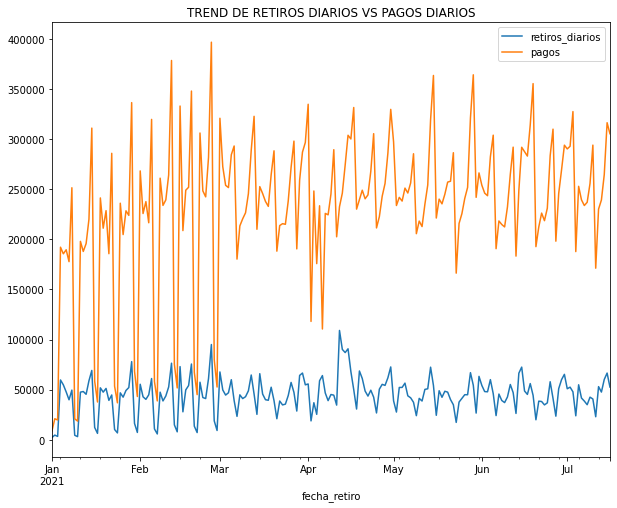

In [67]:
# Consolidado
retiro_pos.plot(figsize=(10,8))
plt.title('TREND DE RETIROS DIARIOS VS PAGOS DIARIOS')
plt.show()